In [25]:
import numpy as np
import scipy.io, scipy.ndimage
import pandas as pd
import matplotlib.pyplot as plt

In [26]:
data1 = scipy.io.loadmat("ex7data1.mat")
data2 = scipy.io.loadmat("ex7data2.mat")
Xdata1 = data1['X']
Xdata2 = data2['X']

In [27]:
def find_closest_centroid(X, centroids):
    k = centroids.shape[0]
    m = X.shape[0]
    distances = np.zeros((m,k))
    for index, c in enumerate(centroids):
        distances[:, index] = np.linalg.norm(X - c, axis=1)
    return np.argmin(distances, axis=1)

In [28]:
def compute_centroids(X, closest, k):
    dim = X.shape[1]
    centroids = np.zeros((k,dim))
    for i in range(k):
        indices = np.argwhere(closest == i).ravel()
        centroids[i] = np.mean(np.take(X, indices, axis=0), axis=0)
    return centroids

In [29]:
def kmeans_centroids(X, k, iters):
    init_centroids = np.random.permutation(X)[:k,]
    for i in range(iters):
        closest = find_closest_centroid(X, init_centroids)
        init_centroids = compute_centroids(X, closest, k)
    return init_centroids

In [30]:
c = kmeans_centroids(Xdata2, 3, 50)

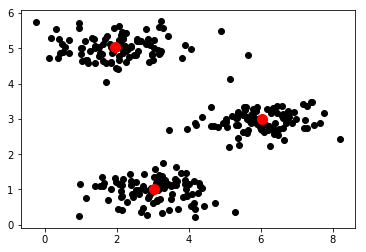

In [31]:
plt.scatter(Xdata2.transpose()[0], Xdata2.transpose()[1], color='black')
plt.scatter(c.transpose()[0], c.transpose()[1], color='red',s=100)

In [32]:
bird = plt.imread("bird_small.png")
print(bird.shape)

(128, 128, 3)


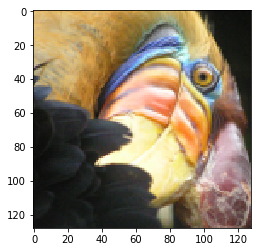

In [33]:
plt.imshow(bird)

In [34]:
bird = bird.reshape(128*128, 3)

In [36]:
colors = kmeans_centroids(bird, 16, 100)

In [39]:
find_closest_centroid(bird, colors)

array([ 2,  2,  2, ...,  7,  7, 10])

In [40]:
bird_compressed

array([[0.47937161, 0.40012178, 0.35904667],
       [0.60084391, 0.51321739, 0.44536686],
       [0.86729336, 0.71690142, 0.45596078],
       [0.70536762, 0.62848324, 0.54426545],
       [0.82375151, 0.7422809 , 0.73297524],
       [0.96352279, 0.85934627, 0.63262355],
       [0.57038051, 0.72004759, 0.86525297],
       [0.22778206, 0.21000764, 0.19924618],
       [0.49721482, 0.36077079, 0.17446868],
       [0.39004716, 0.46074903, 0.64713115],
       [0.13622245, 0.14354263, 0.13505694],
       [0.97632945, 0.94561082, 0.81800771],
       [0.83567679, 0.6016165 , 0.30455363],
       [0.0794012 , 0.08599458, 0.07560214],
       [0.33392057, 0.29009783, 0.28499782],
       [0.67995101, 0.49470612, 0.22432236]])